In [2]:
import os
import numpy as np
from PIL import Image
from PIL import ImageOps
from matplotlib import pyplot as plt

In [5]:
pth = '/DATA/dongik/datasets/CPN_all/Images'
mpth = '/DATA/dongik/datasets/CPN_all/Masks'

dst = '/home/dongik/datasets/cpn/Images'
mdst = '/home/dongik/datasets/cpn/Masks'

for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.bmp'

    img = Image.open(os.path.join(pth, fname)).convert('RGB')
    mask = Image.open(os.path.join(mpth, mname)).convert('L')

    h, w = np.where(np.array(mask, dtype=np.uint8) > 0)
    tl = (w.min(), h.min())
    br = (w.max(), h.max())

    if br[0] - tl[0] > 512 or br[1] - tl[1] > 512:
        raise Exception (br[0] - tl[0], br[1] - tl[1])

    if br[0] > 512:
        # crop W x H (left top W, left top H, right bottom W, right bottom H)
        ltw = int((img.size[0] - 512)/2) + 1
        lth = 0
        rbw = int((img.size[0] - 512)/2) + 513
        rbh = img.size[1]
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    if br[1] > 512:
        ltw = 0
        lth = int((img.size[1] - 512)/2) + 1
        rbw = img.size[0]
        rbh = int((img.size[1] - 512)/2) + 513
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    
    if img.size[0] > 512:
        ltw = 0
        lth = 0
        rbw = 512
        rbh = img.size[1]
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    if img.size[1] > 512:
        ltw = 0
        lth = 0
        rbw = img.size[0]
        rbh = 512
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)

    # green dots
    img = np.array(img, dtype=np.uint8)
    img[0:10, 0:10] = [0, 255, 0]
    img[0:10, -10:] = [0, 255, 0]
    img[-10:, 0:10] = [0, 255, 0]
    img[-10:, -10:] = [0, 255, 0]
    img = Image.fromarray(img)
    
    # padding
    img = ImageOps.expand(img, (0, 0, 512 - img.size[0], 512 - img.size[1]), fill=(0, 0, 0))
    mask = ImageOps.expand(mask, (0, 0, 512 - mask.size[0], 512 - mask.size[1]), fill=0)
    mask = mask.convert('RGB')
    overlay = np.array(img, dtype=np.float32)/2 + np.array(mask, dtype=np.float32)/2
    
    overlay = Image.fromarray(overlay.astype(np.uint8))

    assert( (img.size == (512, 512)) or (mask.size == (512, 512)) )
    # plt.imshow(img)
    # plt.show()
    # plt.imshow(mask, cmap='gray')
    # break    
    img.save(os.path.join(dst, fname.split('.')[0] + '.bmp'))
    mask.save(os.path.join(mdst, fname.split('.')[0] + '.bmp'))
    overlay.save(os.path.join('/home/dongik/datasets/cpn/overlay', fname.split('.')[0] + '.bmp'))


In [18]:
pth = '/DATA/dongik/datasets/CPN_all/Images'
mpth = '/DATA/dongik/datasets/CPN_all/Masks'

dst = '/home/dongik/datasets/cpn/Images'
mdst = '/home/dongik/datasets/cpn/Masks'

for fname in os.listdir(pth):
    mname = fname

    img = Image.open(os.path.join(pth, fname)).convert('RGB')
    mask = Image.open(os.path.join(mpth, mname)).convert('L')

    h, w = np.where(np.array(mask, dtype=np.uint8) > 0)
    tl = (w.min(), h.min())
    br = (w.max(), h.max())

    if br[0] - tl[0] > 512 or br[1] - tl[1] > 512:
        raise Exception (br[0] - tl[0], br[1] - tl[1])

    if br[0] > 512:
        # crop W x H (left top W, left top H, right bottom W, right bottom H)
        ltw = int((img.size[0] - 512)/2) + 1
        lth = 0
        rbw = int((img.size[0] - 512)/2) + 513
        rbh = img.size[1]
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    if br[1] > 512:
        ltw = 0
        lth = int((img.size[1] - 512)/2) + 1
        rbw = img.size[0]
        rbh = int((img.size[1] - 512)/2) + 513
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    
    if img.size[0] > 512:
        ltw = 0
        lth = 0
        rbw = 512
        rbh = img.size[1]
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)
    if img.size[1] > 512:
        ltw = 0
        lth = 0
        rbw = img.size[0]
        rbh = 512
        crop_pnt = ( ltw, lth, rbw, rbh )
        img = img.crop(crop_pnt)
        mask = mask.crop(crop_pnt)

    # green dots
    img = np.array(img, dtype=np.uint8)
    img[0:10, 0:10] = [0, 255, 0]
    img[0:10, -10:] = [0, 255, 0]
    img[-10:, 0:10] = [0, 255, 0]
    img[-10:, -10:] = [0, 255, 0]
    img = Image.fromarray(img)
    
    # padding
    img = ImageOps.expand(img, (0, 0, 512 - img.size[0], 512 - img.size[1]), fill=(0, 0, 0))
    mask = ImageOps.expand(mask, (0, 0, 512 - mask.size[0], 512 - mask.size[1]), fill=0)
    mask = mask.convert('RGB')
    overlay = np.array(img, dtype=np.float32)/2 + np.array(mask, dtype=np.float32)/2
    
    overlay = Image.fromarray(overlay.astype(np.uint8))

    assert( (img.size == (512, 512)) or (mask.size == (512, 512)) )
    # plt.imshow(img)
    # plt.show()
    # plt.imshow(mask, cmap='gray')
    # break    
    img.save(os.path.join(dst, fname.split('.')[0] + '.bmp'))
    mask.save(os.path.join(mdst, fname.split('.')[0] + '.bmp'))
    overlay.save(os.path.join('/data1/sdi/datasets/Median/overlay', fname.split('.')[0] + '.bmp'))


In [61]:
pth = '/data1/sdi/datasets/CPN_all/Images'
mpth = '/data1/sdi/datasets/CPN_all/Masks'

cnt = {}
for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.bmp'
    img = Image.open(os.path.join(pth, fname)).convert('RGB')
    mask = Image.open(os.path.join(mpth, mname)).convert('L')
    mask = np.array(mask, dtype=np.uint8)
    h, w = np.where(mask > 0)
    
    tl = (h.min(), w.min())
    br = (h.max(), w.max())

    # key = (int(img.size[0]/128) * 128, int(img.size[1]/128) * 128)
    key = ( int(br[0]/128) * 128, int(br[1]/128) * 128 )
    if key not in cnt.keys():
        cnt[key] = 1
        # print(img.size)
        # print(tl, br)
        # plt.imshow(np.array(img)[tl[0]:br[0], tl[1]:br[1]])
        # plt.show()
        # plt.imshow(mask[tl[0]:br[0], tl[1]:br[1]])
        # break
        # if key[1] == 512:
        #     print(key, br)
        #     plt.imshow(mask)
        #     break
    else:
        cnt[key] += 1
print( cnt )

{(128, 256): 154, (0, 128): 82, (0, 256): 149, (128, 128): 63, (128, 512): 3, (256, 512): 2, (0, 384): 9, (128, 384): 24, (256, 128): 2, (256, 384): 2}


uint8
(438, 413, 3)
[[[34 34 34]]]
[[[34 34 34]]]


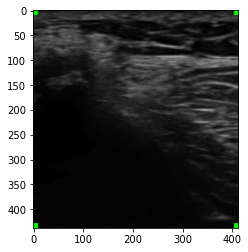

In [2]:
pth = '/data1/sdi/datasets/CPN_all/Images'
mpth = '/data1/sdi/datasets/CPN_all/Masks'

for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.bmp'
    img = Image.open(os.path.join(pth, fname)).convert('RGB')
    mask = Image.open(os.path.join(mpth, mname)).convert('L')
    img = np.array(img, )
    print(img.dtype)
    print(img.shape)
    print(img[10:11, 10:11] )
    img[0:10, 0:10] = [0, 255, 0]
    img[0:10, -10:] = [0, 255, 0]
    img[-10:, 0:10] = [0, 255, 0]
    img[-10:, -10:] = [0, 255, 0]
    print(img[10:11, 10:11] )
    plt.imshow(img,)
    img = Image.fromarray(img)
    img.save('sample.jpg')
    break

#     if img.size[0] > 640:
#         # center crop WxH
#         img = img.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
#         mask = mask.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
        
#     if img.size[1] > 640:
#         img = img.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )
#         mask = mask.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )

#     # img = ImageOps.pad(img, (640, 640), color=255, centering=(0, 0))
#     # mask = ImageOps.pad(mask, (640, 640), color=255, centering=(0, 0))

#     img = ImageOps.expand(img, (0, 0, 640-img.size[0], 640-img.size[1]), fill=0)
#     mask = ImageOps.expand(mask, (0, 0, 640-mask.size[0], 640-mask.size[1]), fill=0)
#     overlay = Image.fromarray(np.array(img)/2 + np.array(mask)/2).convert('L')

#     assert ( img.size == mask.size == (640, 640))

#     img.save(os.path.join(dst, fname))
#     mask.save(os.path.join(mdst, mname))
#     overlay.save(os.path.join('/data1/sdi/datasets/CPN_pad/overlay', fname))
#     cnt += 1

# print(f'cnt: {cnt}')